In [1]:
import pandas as pd
import json
import numpy as np
import requests
import tweepy
import os

# Data Wrangling

## Gather

In [2]:
# Open twitter archive file and image prediction file as dataframe
df_tw=pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
# See how twitter archive file looks like
df_tw.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [4]:
# Download image prediction file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
file_name = url.split('/')[-1]
if not os.path.exists(file_name):
    r = requests.get(url)
    with open(file_name, mode='wb') as file:
        file.write(r.content)

# Read data to dataframe
df_pred = pd.read_csv('image-predictions.tsv', sep='\t')

In [4]:
# Access to Twitter API
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [ ]:
# Gather twitter's retweet counts and favorite counts through twitter API 
#by twitter ID in twitter archive file.
tweet ={}
tweet['tweet_archive']=[]
errors={}

for index, tweet_id in enumerate(df_tw.tweet_id):
    try:
        print(index+1)
        tweet_text = api.get_status(tweet_id,tweet_mode='extended')
        retweet_count= tweet_text.retweet_count
        fav_count= tweet_text.favorite_count
        tweet['tweet_archive'].append({"tweet_id":int(tweet_id), 
                      "retweet_count": int(retweet_count),
                      "fav_count": int(fav_count)})

    except Exception as e:
        print(str(index) + "_"+ str(tweet_id) + str(e))

In [6]:
# Save the data to a txt file
with open('tweet_json.txt', 'w') as tweet_json:
    json.dump(tweet, tweet_json)

In [5]:
# Read the txt file and open as a dataframe
with open('tweet_json.txt') as json_file:  
    data = json.load(json_file)
df_ct = pd.DataFrame(data['tweet_archive'], columns = ['tweet_id', 'retweet_count', 'fav_count'])
df_ct.head()


,tweet_id,retweet_count,fav_count
0,892420643555336193,8313,38011
1,892177421306343426,6140,32630
2,891815181378084864,4066,24559
3,891689557279858688,8457,41362
4,891327558926688256,9158,39540


## Assess

In [7]:
# Now we will assess all three data sets. 
#1. twitter archive enhanced file: df_tw
#2. image predictions file: df_pred
#3. retweet counts and favorite counts file: df_ct

In [8]:
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
# Check if any entry has denominator not equal to 10
df_tw.query('rating_denominator != 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [6]:
# Check if there is any duplicated entries 
df_tw['tweet_id'].duplicated().sum()

0

In [11]:
# Identify entries with outlier rating numerator
df_tw.query('rating_numerator > 20')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [12]:
df_tw.sample()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1757,678764513869611008,NaN,NaN,2015-12-21 02:30:45 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Wilson. He got caught humping the futon. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/678764513...,10,10,Wilson,None,None,None,None


In [13]:
# See how image prediction dataframe looks like
df_pred.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [61]:
df_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
# Get information for the retweet and favorite count dataframe
df_ct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2340 entries, 0 to 2339
Data columns (total 3 columns):
tweet_id         2340 non-null int64
retweet_count    2340 non-null int64
fav_count        2340 non-null int64
dtypes: int64(3)
memory usage: 54.9 KB


In [16]:
df_ct.describe()

,tweet_id,retweet_count,fav_count
count,2.340000e+03,2340.000000,2340.000000
mean,7.422176e+17,2927.471368,7957.469231
std,6.832564e+16,4931.780169,12325.027478
min,6.660209e+17,0.000000,0.000000
25%,6.783394e+17,587.750000,1371.750000
50%,7.186224e+17,1367.000000,3459.000000
75%,7.986954e+17,3411.000000,9739.000000
max,8.924206e+17,83595.000000,164188.000000


### Quality

#### `df_tw` (tweets archive)
   >1. Some tweets are retweets
   >2. Some tweets are replies. We only need original ratings. 
   >3. Timestamp is a string object.   
   >4. Source is a link, not category data type. 
   >5. Not all data in rating_denominator is 10. Some of them is wrong data, but some of them is valid based on the text content.  
   >6. Outliers in rating_numerator. 
   >7. Some rating numerators is float in text content, but rating_numerator type is int in dataframe. 
   >8. tweet_id is int, not string object.
#### `df_pred` (image prediction)
   >1. tweet_id is int, not string object.
#### `df_ct` (retweet and favorite counts)
   >1. tweet_id is int, not string object. 



### Tidiness
   >1. `df_ct`,`df_pred`, and `df_tw` is one type of observational unit. 
   >2. `df_tw`: Columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id are no long needed. 
   >3. `df_tw`: Columns 'doggo','floofer','pupper','puppo' is one variable. 

## Clean

In [47]:
# Copy each dataframe to a new dataframe
df_clean=df_tw.copy()
pred_clean=df_pred.copy()
ct_clean=df_ct.copy()

####  `df_tw`: Some tweets are retweets

##### Define
- Delete retweets rows. Retweets can be found if retweeted_status_id is not null. 


##### Code

In [48]:
df_clean = df_clean[df_clean['retweeted_status_id'].isnull()]
df_clean = df_clean.reset_index(drop=True)

##### Test

In [49]:
# Confirm all retweets have been deleted
df_clean.query('retweeted_status_id != "NaN"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### `df_tw` : Some tweets are replies

##### Define
- Delete reply rows. Retweets can be found if in_reply_to_status_id is not null.

##### Code

In [50]:
df_clean = df_clean[df_clean['in_reply_to_status_id'].isnull()]
df_clean=df_clean.reset_index(drop=True)

##### Test

In [51]:
# Confirm all reply tweets have been deleted
df_clean['in_reply_to_status_id'].notnull().sum()

0

#### `df_tw`: Timestamp is a string object

##### Define
- Change timestamp from string object to datetime object

##### Code

In [52]:
df_clean['timestamp']=pd.to_datetime(df_clean.timestamp)

##### Test

In [53]:
# Confirm timestamp has changed to datetime object
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2097 entries, 0 to 2096
Data columns (total 17 columns):
tweet_id                      2097 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2097 non-null datetime64[ns]
source                        2097 non-null object
text                          2097 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2094 non-null object
rating_numerator              2097 non-null int64
rating_denominator            2097 non-null int64
name                          2097 non-null object
doggo                         2097 non-null object
floofer                       2097 non-null object
pupper                        2097 non-null object
puppo                         2097 non-null object
dtypes: datetime64[ns](1), float

#### `df_tw`: Source is a link, not category data type

##### Define
- Change source to category data type.

##### Code

In [54]:
# Convert source to a utility from a link. 
df_clean['source']=df_clean['source'].apply(lambda x:x.split('>')[-2][:-3])


In [55]:
df_clean.source=df_clean['source'].astype('category')

##### Test

In [56]:
df_clean['source'].value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### `df_tw`: Not all data in rating_denominator is 10. Some of them is wrong data, but some of them is valid based on the text content. 
#### `df_tw`: Some rating numerators is float in text content, but rating_numerator type is int in dataframe. 

##### Define

- Since rating denominator and numerator are related, we will fix invalid values in both columns together. Reasons for invalid data: 1. In the extract program,rating is the aound the second '/', not the first '/'. 2. There is no rating in the text 3. WeRateDogs changed denominator in the text. 
- We will: 1. find all rows that have denominator not equal to 10, and then change rating to the correct value if there is any. 2. Then delete row without rating. 3. Then identify rows with numerator larger than 20, change denominator to 10, and update numerator accordingly. 


##### Code

In [57]:
# Extract entries that have rating_denominator not equal to 10
invalid_de=df_clean.query('rating_denominator!= 10')     

In [58]:
# Issue 1: data extracted from the wrong place in text
# Fetch the correct data, which is the rating with the second '/' in text.
for value in invalid_de.text:
    if value.split('/')[2][0:2]== '10':
        index_val=df_clean[df_clean.text==value].index[0]
        df_clean.iloc[index_val,11]=10
        df_clean.iloc[index_val,10] = int(value.split('/')[1][-2:])

In [59]:
# Issue 2: there is no rating in text
# Drop row with index 403, since there is no rating
df_clean.drop(403,inplace=True)
df_clean=df_clean.reset_index(drop = True)

In [60]:
# Issue 3: the rating in text has denominator other than 10
# Normalize denominator to 10 and update numerator accordingly.
df_clean.rating_numerator=np.where(df_clean.rating_denominator>10,
                              df_clean.rating_denominator*10/df_clean.rating_numerator,
                              df_clean.rating_numerator)
df_clean.rating_denominator=np.where(df_clean.rating_denominator>10,
                                10,df_clean.rating_denominator)


In [61]:
# Issue 4: rating numerator is a float in text, not an integer
# Replace numerator 26 to 11.26, 27 to 11.27, 75 to 9.75 
# per the rating in the tex_clean
df_clean.rating_numerator=df_clean.rating_numerator.replace(26.0000000, 11.26)
df_clean.rating_numerator=df_clean.rating_numerator.replace(27.0000000, 11.27)
df_clean.rating_numerator=df_clean.rating_numerator.replace(75.0000000, 9.75)


In [62]:
# Issue 5: Outlier numerator
# Reset numerator outliers 420 and 1776 to max numerator 14
df_clean.rating_numerator=df_clean.rating_numerator.replace(420.0000000, 14)
df_clean.rating_numerator=df_clean.rating_numerator.replace(1776.0000000, 14)

##### Test

In [63]:
# Confirm all rating denominator ia 10
df_clean.rating_denominator.value_counts()

10    2096
Name: rating_denominator, dtype: int64

In [64]:
# Confirm numerator 
df_clean.rating_numerator.value_counts().sort_index()

0.000000       1
1.000000       4
2.000000       9
3.000000      19
4.000000      15
5.000000      34
6.000000      32
7.000000      51
8.000000      98
8.333333       4
9.000000     153
9.090909       5
9.750000       1
10.000000    438
11.000000    414
11.111111      1
11.260000      1
11.270000      1
12.000000    486
13.000000    288
14.000000     41
Name: rating_numerator, dtype: int64

#### `df_tw`: Columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id are no long needed.

##### Define

- Drop columns retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id since they are no long needed.  . 

##### Code

In [65]:
df_clean.drop(['retweeted_status_id','retweeted_status_user_id',
                                'retweeted_status_timestamp', 'in_reply_to_status_id',
                                'in_reply_to_user_id'],axis=1,inplace=True)

##### Test

In [66]:
# Confirm above columns have been deleted
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2096 entries, 0 to 2095
Data columns (total 12 columns):
tweet_id              2096 non-null int64
timestamp             2096 non-null datetime64[ns]
source                2096 non-null category
text                  2096 non-null object
expanded_urls         2093 non-null object
rating_numerator      2096 non-null float64
rating_denominator    2096 non-null int64
name                  2096 non-null object
doggo                 2096 non-null object
floofer               2096 non-null object
pupper                2096 non-null object
puppo                 2096 non-null object
dtypes: category(1), datetime64[ns](1), float64(1), int64(2), object(7)
memory usage: 182.4+ KB


#### `df_tw`: Columns 'doggo','floofer','pupper','puppo' is one variable.

##### Define

-  Merge columns doggo, floofer, pupper, puppo to one column. 

##### Code

In [93]:
df_clean['stage']=df_clean[['doggo','floofer','pupper','puppo']].apply(
    lambda x:','.join(x.dropna().map(str)),axis=1)

df_clean['stage']=df_clean['stage'].apply(
    lambda x: np.NaN if x=="" else x)

df_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)

##### Test

In [94]:
df_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,stage
1137,703079050210877440,2016-02-26 04:48:02,Twitter for iPhone,This is a Butternut Cumberfloof. It's not wind...,https://twitter.com/dog_rates/status/703079050...,11.0,10,a,NaN
1732,672902681409806336,2015-12-04 22:17:55,Twitter for iPhone,This is Jimison. He's stuck in a pot. Damn it ...,https://twitter.com/dog_rates/status/672902681...,9.0,10,Jimison,NaN
616,772193107915964416,2016-09-03 22:02:38,Twitter for iPhone,This is Willem. He's a Penn State pupper. Thin...,https://twitter.com/dog_rates/status/772193107...,12.0,10,Willem,pupper
29,886258384151887873,2017-07-15 16:17:19,Twitter for iPhone,This is Waffles. His doggles are pupside down....,https://twitter.com/dog_rates/status/886258384...,13.0,10,Waffles,NaN
1994,667806454573760512,2015-11-20 20:47:20,Twitter for iPhone,This is Filup. He is overcome with joy after f...,https://twitter.com/dog_rates/status/667806454...,10.0,10,Filup,NaN


In [95]:
df_clean['stage'].value_counts()

pupper           221
doggo             72
puppo             23
floofer            9
doggo,pupper       9
doggo,floofer      1
doggo,puppo        1
Name: stage, dtype: int64

#### `df_ct`,`df_pred`, and `df_tw` is one type of observational unit

##### Define
- Merge df_clean, pred_clean and ct_clean by tweet_id.

##### Code

In [96]:
# Join table df_clean, ct_clean and pred_clean, and exclude entries that have been deleted
df_clean=pd.merge(df_clean, ct_clean, on='tweet_id', how='inner')
df_clean=pd.merge(df_clean, pred_clean, on='tweet_id', how='inner')


##### Test

In [97]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1968 entries, 0 to 1967
Data columns (total 22 columns):
tweet_id              1968 non-null int64
timestamp             1968 non-null datetime64[ns]
source                1968 non-null category
text                  1968 non-null object
expanded_urls         1968 non-null object
rating_numerator      1968 non-null float64
rating_denominator    1968 non-null int64
name                  1968 non-null object
stage                 303 non-null object
retweet_count         1968 non-null int64
fav_count             1968 non-null int64
jpg_url               1968 non-null object
img_num               1968 non-null int64
p1                    1968 non-null object
p1_conf               1968 non-null float64
p1_dog                1968 non-null bool
p2                    1968 non-null object
p2_conf               1968 non-null float64
p2_dog                1968 non-null bool
p3                    1968 non-null object
p3_conf               1968 non

#### `df_tw`, `df_pred`,`df_ct` : tweet_id is int, not string object

##### Define

- Change tweet_id in df_clean and df_pred to string type. 

##### Code

In [98]:
df_clean.tweet_id=df_clean.tweet_id.astype(str)

##### Test

In [99]:
print(type(df_clean.tweet_id[0]))

<class 'str'>


# Saving Data

In [100]:
# Save cleaned twitter archive data to csv file
# Save cleaned image prediction data to csv file
df_clean.to_csv('twitter_archive_master.csv', index=False)

# Analyzing

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

**Question 1. What's WeRateDog's popularity overtime(2015 - 2017)?**

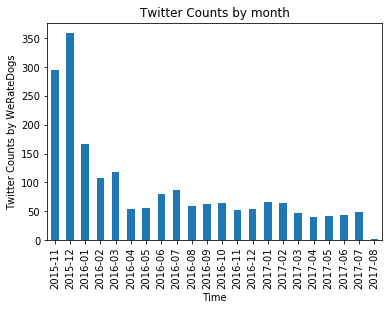

In [106]:
# How many pictures have been rated overtime? 
df_plt1=pd.DataFrame(df_clean.groupby(df_clean['timestamp'].dt.strftime(
    '%Y-%m'))['tweet_id'].count().sort_index())
df_plt1.plot(kind='bar',title="Twitter Counts by month", legend=False)
plt.xlabel('Time')
plt.ylabel('Twitter Counts by WeRateDogs');
                                               

Text(0,0.5,'Count')

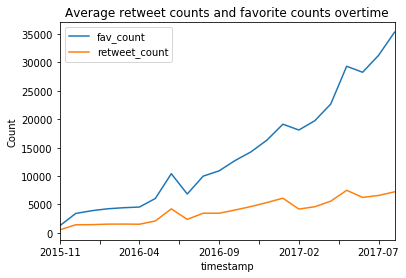

In [107]:
# What's the average retweets and favorites overtime? 
fav_count=df_clean.groupby(df_clean['timestamp'].dt.strftime('%Y-%m'))['fav_count'].mean().sort_index()
retw_count=df_clean.groupby(df_clean['timestamp'].dt.strftime('%Y-%m'))['retweet_count'].mean().sort_index()
df_plt2 = pd.concat([fav_count,retw_count], axis=1)
df_plt2.plot(title="Average retweet counts and favorite counts overtime")
plt.ylabel("Count");


**Answer**
> In Dec 2015, @WeRateDogs posted more than 350 tweets! Wow, that’s the highest record! But after this peak, the number of tweets reduced dramatically. From April 2016 to Aug 2017, the account stayed with around 50 rating tweets every month. Although the frequency of tweeting decreased, each twitter's average retweet counts and favorite counts increased overtime. 

**Question 2. Does higher score leads to more retweets and favorites?**

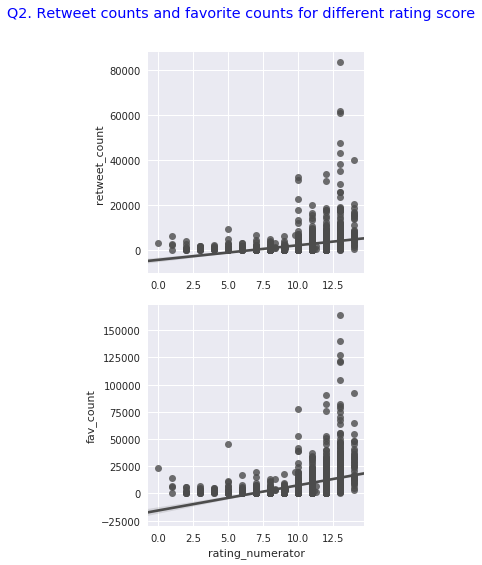

In [108]:
# Draw a figure with rating score as x label, retweet counts as y label 
# Draw a figure with rating score as x label, favorite counts as y label 
sns.set()
g=sns.PairGrid(df_clean, x_vars=["rating_numerator"], 
               y_vars=["retweet_count", "fav_count",],size=4)
g.map(sns.regplot,color=".3")
g.fig.suptitle('Q2. Retweet counts and favorite counts for different rating score', color='blue')
g.fig.subplots_adjust(top=0.9)
plt.show()

In [109]:
# Correlation between rating score and retweet counts
print(np.corrcoef(x=df_clean['rating_numerator'], y=df_clean['retweet_count']))

# Correlation between rating score and favorite counts
print(np.corrcoef(x=df_clean['rating_numerator'], y=df_clean['fav_count']))


[[ 1.         0.2976494]
 [ 0.2976494  1.       ]]
[[ 1.          0.39199001]
 [ 0.39199001  1.        ]]


**Answer:**
> Rating score presents a positive correlation with retweet counts and favorites counts. However, the positive relationship is moderate with correlation < 0.4. From the picture above, some tweets with high rating doesn't have high favorites or retweets score. But tweets that've been retweeted or favorited most do have higher ratings. 


**Question 3.What kind of dog breeds have higher rating?**

In [112]:
# Calculate mean rating score for each dog breed
df_clean.groupby(['p1'])['rating_numerator'].mean().sort_values(ascending=False).head(20)


p1
microphone          14.0
pole                14.0
limousine           14.0
military_uniform    14.0
pedestal            14.0
laptop              14.0
prison              14.0
revolver            13.0
padlock             13.0
snowmobile          13.0
dough               13.0
cliff               13.0
convertible         13.0
restaurant          13.0
syringe             13.0
fountain            13.0
marmot              13.0
teapot              13.0
loupe               13.0
tiger_shark         13.0
Name: rating_numerator, dtype: float64

**Answer:**
> None of the categories with the high rating scores are dogs! The neutral network algorithm needs more development!
    